# Simple Proof of concept using Pil/Skimage to determine semaphore keys position for automated recording of transmission. See http://www.adobe.com/aboutadobe/philanthropy/sjsemaphore/transmission.html

In [38]:
import PIL
import skimage
from skimage import color
import pyscreenshot as ImageGrab
import matplotlib.pyplot as plt
%matplotlib inline
import time
from skimage.filters import threshold_otsu
from skimage.feature import match_template


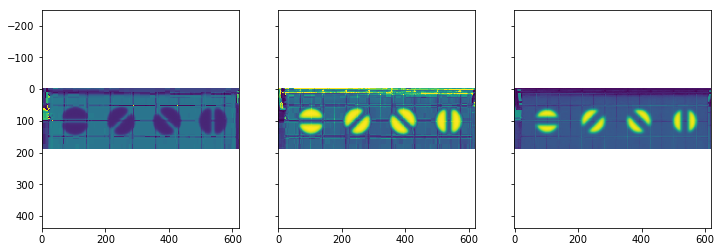

In [11]:
# part of the screen
time.sleep(5)
im=ImageGrab.grab(bbox=(320,290,940,480)).convert(mode ='RGB')
hsv = color.rgb2hsv(im)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
ax1.imshow(hsv[:,:,0])
ax2.imshow(hsv[:,:,1])
ax3.imshow(hsv[:,:,2])

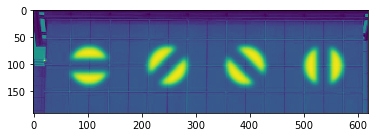

In [12]:
plt.imshow(hsv[:,:,2])

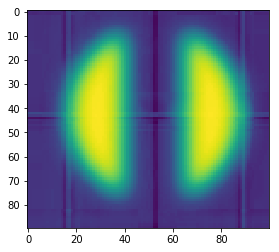

In [28]:
plt.imshow(hsv[:,:,2][60:150,485:585])

In [29]:
horizontal = hsv[:,:,2][60:150,50:150]
vertical = hsv[:,:,2][60:150,485:585]
left = hsv[:,:,2][60:150,340:440]
right = hsv[:,:,2][60:150,200:300]

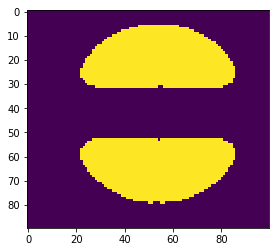

In [37]:
plt.imshow(horizontal>threshold_otsu(horizontal))

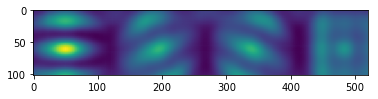

In [46]:
result = match_template(hsv[:,:,2],horizontal)
plt.imshow(result)

(array([  8432.,  11863.,  13258.,  10506.,   5475.,   1802.,    802.,
           194.,    159.,    130.]),
 array([-0.33439004, -0.20095106, -0.06751208,  0.0659269 ,  0.19936588,
         0.33280486,  0.46624384,  0.59968282,  0.7331218 ,  0.86656078,
         0.99999976]),
 <a list of 10 Patch objects>)

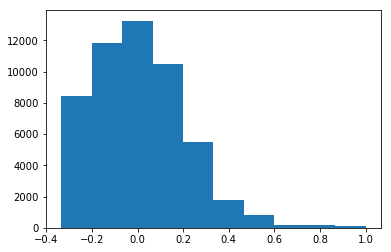

In [48]:
plt.hist(result.ravel())

In [71]:
import numpy as np
loc = [[50,160,40,160],[50,160,475,595],[50,160,330,450],[50,160,190,310]]
time.sleep(5)
for _ in range(20):
    V=color.rgb2hsv(ImageGrab.grab(bbox=(320,290,940,480)).convert(mode ='RGB'))[:,:,2]
    pos = []
    for l in loc:
        if np.max(match_template(V[l[0]:l[1],l[2]:l[3]],horizontal)) > 0.99:
            pos.append('h')
        elif np.max(match_template(V[l[0]:l[1],l[2]:l[3]],vertical)) > 0.99:
            pos.append('v')
        elif np.max(match_template(V[l[0]:l[1],l[2]:l[3]],left)) > 0.99:
            pos.append('l')      
        elif np.max(match_template(V[l[0]:l[1],l[2]:l[3]],right)) > 0.99:
            pos.append('r')        
        else:
            pos.append('-')        
    print(pos)
    time.sleep(1)
        
        
        
        
        
        
        

['v', 'h', 'l', 'r']
['v', 'h', 'l', 'r']
['v', 'h', 'l', 'r']
['-', '-', '-', '-']
['v', 'h', 'r', 'v']
['v', 'h', 'r', 'v']
['v', 'h', 'r', 'v']
['-', 'l', '-', 'r']
['v', 'l', 'l', 'r']
['v', 'l', 'l', 'r']
['v', 'l', 'l', 'r']
['-', 'v', 'v', 'h']
['l', 'v', 'v', 'h']
['l', 'v', 'v', 'h']
['l', 'v', 'v', 'h']
['-', '-', '-', '-']
['h', 'v', 'r', 'l']
['h', 'v', 'r', 'l']
['h', 'v', 'r', 'l']
['-', '-', '-', '-']


In [74]:
import numpy as np
loc = [[50,160,40,160],[50,160,475,595],[50,160,330,450],[50,160,190,310]]
time.sleep(5)
pos_list =[]
cur_pos = []
for _ in range(60):
    V=color.rgb2hsv(ImageGrab.grab(bbox=(320,290,940,480)).convert(mode ='RGB'))[:,:,2]
    pos=[]
    for l in loc:
        if np.max(match_template(V[l[0]:l[1],l[2]:l[3]],horizontal)) > 0.99:
            pos.append('h')
        elif np.max(match_template(V[l[0]:l[1],l[2]:l[3]],vertical)) > 0.99:
            pos.append('v')
        elif np.max(match_template(V[l[0]:l[1],l[2]:l[3]],left)) > 0.99:
            pos.append('l')      
        elif np.max(match_template(V[l[0]:l[1],l[2]:l[3]],right)) > 0.99:
            pos.append('r')        
        else:
            pos.append('-') 
            
    if len(cur_pos)>2 and cur_pos[-1] == cur_pos[-2] == cur_pos[-3]:
        pos_list.append(cur_pos[-1])
        cur_pos=[]
    else:
        cur_pos.append(pos)
    time.sleep(1)

print(pos_list)
        
        
        
        
        
        
        
        

[['l', 'v', 'v', 'h'], ['l', 'v', 'v', 'l'], ['v', 'v', 'l', 'v'], ['v', 'l', 'r', 'h'], ['l', 'l', 'r', 'r'], ['r', 'v', 'v', 'h'], ['v', 'r', 'h', 'r'], ['h', 'r', 'v', 'l'], ['l', 'v', 'r', 'v'], ['r', 'v', 'h', 'h'], ['h', 'h', 'v', 'l'], ['l', 'h', 'l', 'r'], ['h', 'h', 'l', 'h'], ['h', 'l', 'h', 'l']]


Transmission recorded correctly. First two readings did not initalize flash stream. Seems to require interaction.